In [17]:
import torch 
from torch.autograd import Variable # for computational graphs
import torch.nn as nn 
import torch.nn.functional as F # Non-linearities package
import torch.optim as optim # Optimization package
from torch.utils.data import Dataset, TensorDataset, DataLoader 
import torchvision
import torchvision.transforms as transforms 

import matplotlib.pyplot as plt # for plotting
import numpy as np


In [18]:
seed = 777
np.random.seed(seed)
torch.manual_seed(seed)

In [19]:
transform = transforms.Compose(
   [
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))# converts from PIL Image format to a FloatTensor format
   ])

train_set = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform) 
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True)

test_set = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4,shuffle=True)


classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')



In [20]:
#Defining some parameters for the CNN

cnn_epochs = 10
cnn_batch_size = 4
cnn_learning_rate = 0.001



In [21]:
#Defining some parameters for the CNN
nn_epochs = 50
nn_batch_size = 4
nn_learning_rate = 0.001

number_input_units = 28*28
number_hidden_1_units = 50

number_output_units = 10

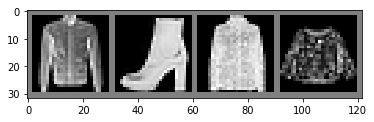

In [22]:
#Displaying some training images

def show(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    npimgt = np.transpose(npimg, (1,2,0))
    #print(npimgt.shape[2])
    plt.imshow(npimgt, interpolation='nearest')
    plt.show()

dataiter = iter(train_loader)

images, labels = dataiter.next()
#print(labels[3])

#images=Tensor(images)

show(torchvision.utils.make_grid(images))




In [23]:
#Defining the flow of the CNN network
class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5) 
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.fc1 = nn.Linear(4*4*20, 120) 
        self.fc2 = nn.Linear(120, 10)
        self.relu = nn.ReLU()
        
        

    def forward(self, x):
        x = self.conv1(x)
        #print(x.size())
        x = self.relu(x)
        #print(x.size())
        x = self.pool(x)
        #print(x.size())
        x = self.conv2(x)
        #print(x.size())
        x = self.relu(x)
        #print(x.size())
        x = self.pool(x)
        #print(x.size())
        x = x.view(-1, 20*4*4) 
        x = self.fc1(x)             
        x = self.relu(x)
        x = self.fc2(x)
        #x = self.relu(x)
        return x
cnn_net = CNNNet()

In [24]:
#Defining the flow of the NN network
class NNNet(nn.Module):
    def __init__(self):
        super(NNNet, self).__init__()
        
        self.fp1 = nn.Linear(number_input_units, number_hidden_1_units) 
        self.fp2 = nn.Linear(number_hidden_1_units, number_output_units)
        self.relu = nn.ReLU()
        

    def forward(self, y):
        y = y.view(-1, number_input_units) 
        y = self.fp1(y)             
        y = self.relu(y)
        y = self.fp2(y)
        y = self.relu(y)
        return y
nn_net = NNNet()

In [25]:
#Defining the loss functions and Optimizers
loss_function = nn.CrossEntropyLoss()
cnn_optimizer = optim.SGD(cnn_net.parameters(), lr = cnn_learning_rate)

nn_optimizer = optim.SGD(nn_net.parameters(), lr = nn_learning_rate)

[]
Iteration1
Total 60000
Accuracy of the CNN network on the training images: 65 %
Iteration2
Total 60000
Accuracy of the CNN network on the training images: 80 %
Iteration3
Total 60000
Accuracy of the CNN network on the training images: 83 %
Iteration4
Total 60000
Accuracy of the CNN network on the training images: 84 %
Iteration5
Total 60000
Accuracy of the CNN network on the training images: 86 %
Iteration6
Total 60000
Accuracy of the CNN network on the training images: 86 %
Iteration7
Total 60000
Accuracy of the CNN network on the training images: 87 %
Iteration8
Total 60000
Accuracy of the CNN network on the training images: 87 %
Iteration9
Total 60000
Accuracy of the CNN network on the training images: 88 %
Iteration10
Total 60000
Accuracy of the CNN network on the training images: 88 %


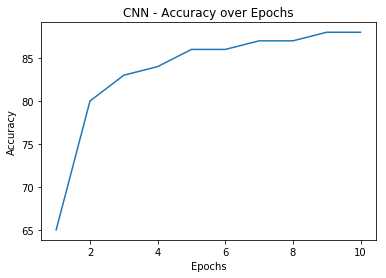

In [26]:
#Executing the CNN - both forward and back passes are executed
cnn_training_correct = 0
accuracy_array = []
total = 0
epoch_array = []
print(accuracy_array)

for epoch in range(cnn_epochs):
    total = 0
    cnn_training_correct = 0
    for i, (images, labels) in enumerate(iter(train_loader)):
        cnn_net.zero_grad()
        predicted_output = cnn_net(Variable(images))
        loss = loss_function(predicted_output, Variable(labels))
        loss.backward()
        cnn_optimizer.step()
        _, cnn_training_predicted = torch.max(predicted_output.data, 1)
        
        total += labels.size(0)
        cnn_training_correct += (cnn_training_predicted == labels).sum()
    
    print("Iteration" + str(epoch+1))
    print("Total", total)
    print('Accuracy of the CNN network on the training images: %d %%' % (100 * cnn_training_correct / total))
    accuracy_array.append((100 * cnn_training_correct / total))
    epoch_array.append(epoch+1)

plt.plot(epoch_array, accuracy_array)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("CNN - Accuracy over Epochs")
plt.show()


    

[]
Iteration1
Accuracy of the NN network on the training images: 61 %
Total 60000
Iteration2
Accuracy of the NN network on the training images: 68 %
Total 60000
Iteration3
Accuracy of the NN network on the training images: 69 %
Total 60000
Iteration4
Accuracy of the NN network on the training images: 69 %
Total 60000
Iteration5
Accuracy of the NN network on the training images: 70 %
Total 60000
Iteration6
Accuracy of the NN network on the training images: 70 %
Total 60000
Iteration7
Accuracy of the NN network on the training images: 70 %
Total 60000
Iteration8
Accuracy of the NN network on the training images: 71 %
Total 60000
Iteration9
Accuracy of the NN network on the training images: 71 %
Total 60000
Iteration10
Accuracy of the NN network on the training images: 71 %
Total 60000
Iteration11
Accuracy of the NN network on the training images: 71 %
Total 60000
Iteration12
Accuracy of the NN network on the training images: 71 %
Total 60000
Iteration13
Accuracy of the NN network on the 

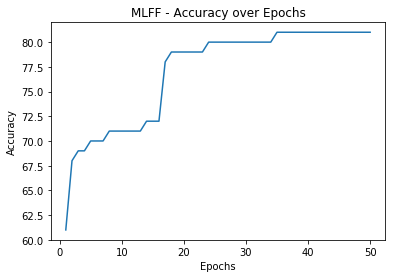

In [27]:
nn_training_correct = 0
nn_accuracy_array = []
total = 0
nn_epoch_array = []
print(nn_accuracy_array)

#Executing the NN - both forward and back passes are executed
for epoch in range(nn_epochs):
    total = 0
    nn_training_correct = 0
    for i, (images, labels) in enumerate(iter(train_loader)):
        nn_net.zero_grad()
        nn_predicted_output = nn_net(Variable(images))
        nn_loss = loss_function(nn_predicted_output, Variable(labels))
        nn_loss.backward()
        nn_optimizer.step()
        _, nn_training_predicted = torch.max(nn_predicted_output.data, 1)
        
        total += labels.size(0)
        nn_training_correct += (nn_training_predicted == labels).sum()
    
        
        #print(loss)
    print("Iteration" + str(epoch+1))
    print('Accuracy of the NN network on the training images: %d %%' % (100 * nn_training_correct / total))
    print("Total", total)
    nn_accuracy_array.append((100 * nn_training_correct / total))
    nn_epoch_array.append(epoch+1)

plt.plot(nn_epoch_array, nn_accuracy_array)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MLFF - Accuracy over Epochs")
plt.show()


    

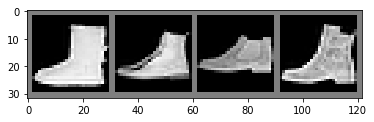

tensor([[ -2.7470,  -8.8225,  -6.0588,  -6.0418,  -2.9345,   5.1362,
          -3.0379,   7.5588,   3.0095,  13.4649],
        [ -2.2408,  -8.5226,  -4.0214,  -5.5712,  -3.4301,   4.2738,
          -2.0933,  10.4331,   2.2552,  10.5263],
        [ -1.4050,  -7.2905,  -5.0974,  -5.1786,  -6.6678,   6.7819,
          -3.3738,   9.1086,   2.7829,  11.2079],
        [ -4.0474,  -8.2055,  -5.5968,  -5.4768,  -2.1942,   4.4925,
          -2.7458,   8.5994,   1.6053,  13.0757]])
tensor([ 9,  9,  9,  9])
Predicted by CNN:  Ankle boot Ankle boot Ankle boot Ankle boot
Predicted by NN:  T-shirt/top Sneaker T-shirt/top T-shirt/top
Actual Image:  Ankle boot Ankle boot Ankle boot Ankle boot


In [28]:
#Doing some predictions on the test set - from models created by both the networks

dataiter = iter(test_loader)
images, labels = dataiter.next()
show(torchvision.utils.make_grid(images))
cnn_outputs = cnn_net(Variable(images))
nn_outputs = nn_net(Variable(images))
print(cnn_outputs)
_, cnn_predicted = torch.max(cnn_outputs.data, 1)
_, nn_predicted = torch.max(nn_outputs.data, 1)

print(cnn_predicted)
print('Predicted by CNN: ', ' '.join('%5s' % classes[cnn_predicted[j]]
                              for j in range(4)))

print('Predicted by NN: ', ' '.join('%5s' % classes[nn_predicted[j]]
                              for j in range(4)))

print('Actual Image: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [29]:
#Testing the accuracy of both the models
cnn_correct = 0
nn_correct = 0
total = 0
for data in test_loader:
    images, labels = data
    cnn_outputs = cnn_net(Variable(images))
    nn_outputs = nn_net(Variable(images))
    _, cnn_predicted = torch.max(cnn_outputs.data, 1)
    _, nn_predicted = torch.max(nn_outputs.data, 1)
    
    total += labels.size(0)
    cnn_correct += (cnn_predicted == labels).sum()
    nn_correct += (nn_predicted == labels).sum()
    
print('Accuracy of the CNN network on the ' + str(total) + ' test images: %d %%' % (
    100 * cnn_correct / total))

print('Accuracy of the NN network on the ' + str(total) + ' test images: %d %%' % (
    100 * nn_correct / total))


Accuracy of the CNN network on the 10000 test images: 87 %
Accuracy of the NN network on the 10000 test images: 78 %


In [30]:
cnn_correct = 0
nn_correct = 0
total = 0
cnn_array = []

for data in test_loader:
    images, labels = data
    cnn_outputs = cnn_net(Variable(images))
    nn_outputs = nn_net(Variable(images))
    cnn_array.append(cnn_outputs)
    _, cnn_predicted = torch.max(cnn_outputs.data, 1)
    _, nn_predicted = torch.max(nn_outputs.data, 1)
    
    total += labels.size(0)
    cnn_correct += (cnn_predicted == labels).sum()
    nn_correct += (nn_predicted == labels).sum()
    
print('Accuracy of the CNN network on the ' + str(total) + ' test images: %d %%' % (
    100 * cnn_correct / total))

print('Accuracy of the NN network on the ' + str(total) + ' test images: %d %%' % (
    100 * nn_correct / total))

Accuracy of the CNN network on the 10000 test images: 87 %
Accuracy of the NN network on the 10000 test images: 78 %


In [44]:
# creating an ensemble of both the networks - a simple average of the outputs of both these networks.
#The Ensemble provides a marignally better output.
cnn_correct = 0
nn_correct = 0
ens_correct = 0
total = 0
ens_array = []

for data in test_loader:
    images, labels = data
    cnn_outputs = cnn_net(Variable(images))
    nn_outputs = nn_net(Variable(images))
    ensemble_output = (torch.add(cnn_outputs, nn_outputs))/2
    
    #ens_array.append(ensemble_output)
    _, cnn_predicted = torch.max(cnn_outputs.data, 1)
    _, nn_predicted = torch.max(nn_outputs.data, 1)
    _, ens_predicted = torch.max(ensemble_output.data, 1)

    total += labels.size(0)
    cnn_correct += (cnn_predicted == labels).sum()
    nn_correct += (nn_predicted == labels).sum()
    ens_correct += (ens_predicted == labels).sum()

#print(ens_array)
print('Accuracy of the CNN network on the ' + str(total) + ' test images: %d %%' % (
    100 * cnn_correct / total))

print('Accuracy of the NN network on the ' + str(total) + ' test images: %d %%' % (
    100 * nn_correct / total))

print('Accuracy of the Ensemble network on the ' + str(total) + ' test images: %d %%' % (
    100 * ens_correct / total))

Accuracy of the CNN network on the 10000 test images: 87 %
Accuracy of the NN network on the 10000 test images: 78 %
Accuracy of the Ensemble network on the 10000 test images: 88 %
